# LAB_3

## ZAD_1


In [1]:
import numpy as np
import itertools

def LS(f, opseg, x0, delta_x, N, eps):
    """
    Lokalno pretraživanje - pretražuje SVE susjede (3^n - 1).
    """
    x_best = np.array(x0, dtype=float)
    v_best = f(*x_best)

    n_dim = len(opseg)  # Broj dimenzija

    for iteracija in range(N):
        improved = False

        # Generiši sve kombinacije pomjeranja: (-1, 0, +1) za svaku dimenziju
        pomjeranja = list(itertools.product([-1, 0, 1], repeat=n_dim))

        # Ukloni (0, 0, ..., 0) - to je trenutna tačka
        pomjeranja.remove(tuple([0]*n_dim))

        # Provjeri sve susjede
        for pomjeranje in pomjeranja:
            x_novi = x_best.copy()

            # Pomjeri u svim dimenzijama
            validan = True
            for dim in range(n_dim):
                x_novi[dim] += pomjeranje[dim] * delta_x

                # Provjeri granice
                if x_novi[dim] < opseg[dim][0] or x_novi[dim] > opseg[dim][1]:
                    validan = False
                    break

            if not validan:
                continue

            # Izračunaj vrijednost
            v_novi = f(*x_novi)

            # Ako je bolja, zapamti
            if v_novi < v_best - eps:
                x_best = x_novi
                v_best = v_novi
                improved = True

        # Ako nema poboljšanja, stani
        if not improved:
            break

    return x_best, v_best

# Mali test na paraboloidu

In [3]:
# Definišemo funkciju
def paraboloid(x1, x2):
    return x1**2 + x2**2

# Testiramo LS
opseg = [[-2, 2], [-2, 2]]
x0 = [1.5, 1.5]  # Počinjemo daleko od minimuma
delta_x = 0.1
N = 100
eps = 0.001

x_min, v_min = LS(paraboloid, opseg, x0, delta_x, N, eps)

print(f"Pronađeni minimum: x = {x_min}")
print(f"Vrijednost funkcije: f(x) = {v_min}")
print(f"Pravi minimum je na (0, 0) sa vrijednošću 0")

Pronađeni minimum: x = [-1.94289029e-16 -1.94289029e-16]
Vrijednost funkcije: f(x) = 7.549645381997965e-32
Pravi minimum je na (0, 0) sa vrijednošću 0


#ZAD_2

Pomocne funckije

In [4]:
import numpy as np

def Perturbacija(opseg, Omega_mem):
    """
    Generiše random tačku iz problemskog prostora.
    """
    x_nova = []
    for i in range(len(opseg)):
        # Random broj između granica
        x_nova.append(np.random.uniform(opseg[i][0], opseg[i][1]))
    return np.array(x_nova)


def AzuriranjeMemorije(x_novi, v_novi, Omega_mem):
    """
    Dodaje novi pronađeni lokalni minimum u memoriju.
    Memorija je lista tupla: [(x1, v1), (x2, v2), ...]
    """
    Omega_mem.append((x_novi.copy(), v_novi))
    return Omega_mem


def UslovPrihvatanja(x_best, v_best, x_novi, v_novi):
    """
    Vraća bolji minimum (onaj sa manjom vrijednošću).
    """
    if v_novi < v_best:
        return x_novi, v_novi
    else:
        return x_best, v_best

Implementacija ILS

In [5]:
def ILS(f, opseg, x0, delta_x, N, eps, M):
    """
    Iterated Local Search algoritam.
    M = broj ponavljanja lokalnog pretraživanja
    """
    # 1. Prvi lokalni minimum
    x_best, v_best = LS(f, opseg, x0, delta_x, N, eps)

    # 2. Inicijalizuj memoriju
    Omega_mem = []
    Omega_mem = AzuriranjeMemorije(x_best, v_best, Omega_mem)

    # 3. Ponovi M puta
    for i in range(M):
        # Teleportuj se na random mjesto
        x_perturbacija = Perturbacija(opseg, Omega_mem)

        # Nađi lokalni minimum od te tačke
        x_novi, v_novi = LS(f, opseg, x_perturbacija, delta_x, N, eps)

        # Sačuvaj u memoriju
        Omega_mem = AzuriranjeMemorije(x_novi, v_novi, Omega_mem)

        # Prihvati ako je bolji
        x_best, v_best = UslovPrihvatanja(x_best, v_best, x_novi, v_novi)

    return x_best, v_best, Omega_mem



Testiranje

In [6]:
# Test na paraboloidu
x_min, v_min, memorija = ILS(paraboloid, [[-2, 2], [-2, 2]], [1.5, 1.5], 0.1, 100, 0.001, M=10)

print(f"ILS Minimum: {x_min}")
print(f"ILS Vrijednost: {v_min}")
print(f"Broj pronađenih lokalnih minimuma: {len(memorija)}")

ILS Minimum: [-1.94289029e-16 -1.94289029e-16]
ILS Vrijednost: 7.549645381997965e-32
Broj pronađenih lokalnih minimuma: 11


# ZAD_3


FUNKCIJA: Paraboloid: $f(x_1,x_2) = x_1^2 + x_2^2$
LS:  x = [5.84254867e-15 5.84254867e-15], f(x) = 0.000000
ILS: x = [5.84254867e-15 5.84254867e-15], f(x) = 0.000000
Globalni minimum: x = [0, 0], f(x) = 0.000000
Broj globalnih minimuma: 1
ILS broj pokušaja: 21


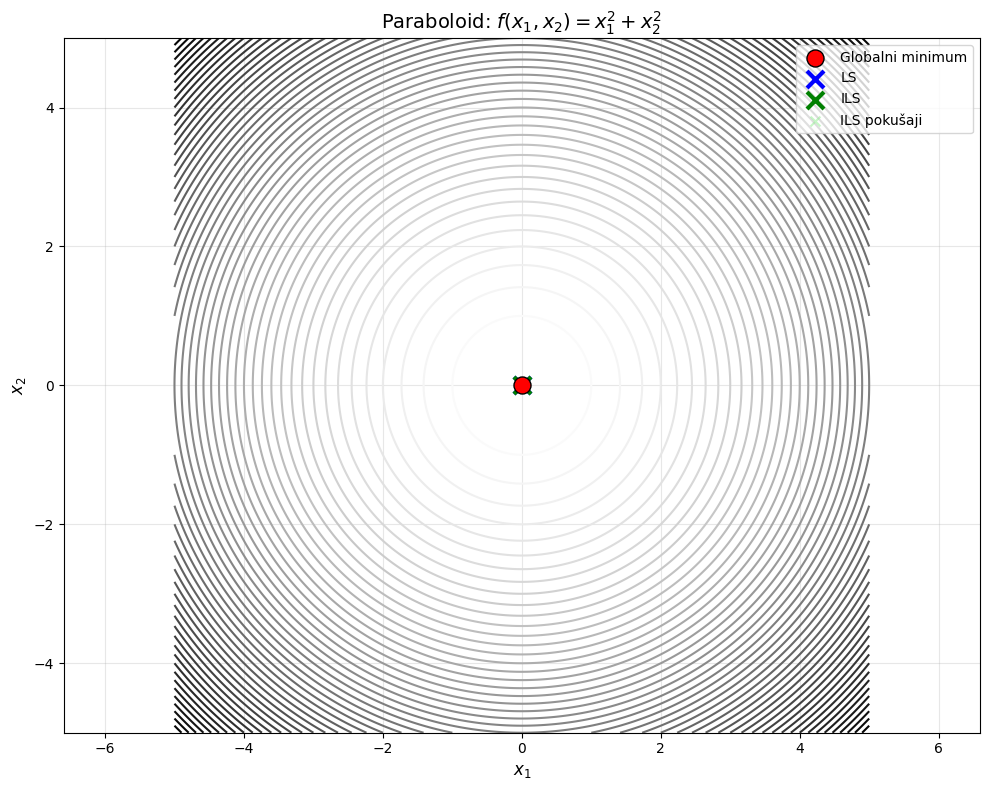


FUNKCIJA: Rastrigin
LS:  x = [4. 4.], f(x) = 32.000000
ILS: x = [1.97894709 0.01973359], f(x) = 4.080752
Globalni minimum: x = [0, 0], f(x) = 0.000000
Broj globalnih minimuma: 1
ILS broj pokušaja: 21


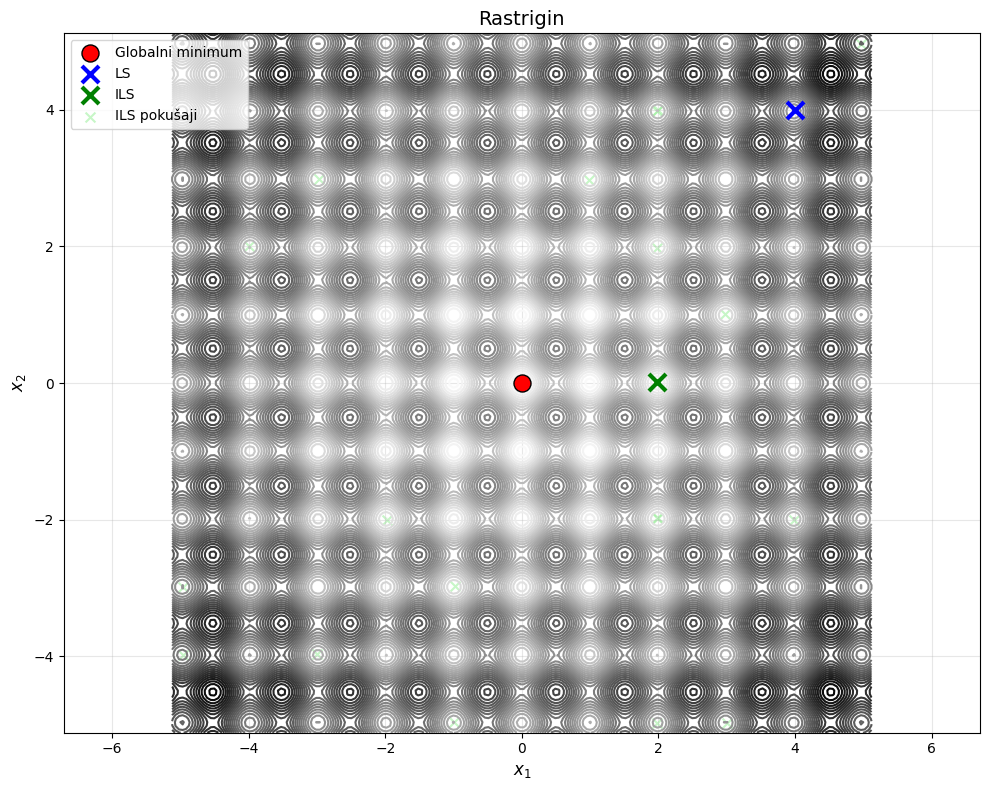


FUNKCIJA: Drop-Wave
LS:  x = [2.95 2.95], f(x) = -0.184966
ILS: x = [ 0.87134928 -0.57501554], f(x) = -0.785578
Globalni minimum: x = [0, 0], f(x) = -1.000000
Broj globalnih minimuma: 1
ILS broj pokušaja: 21


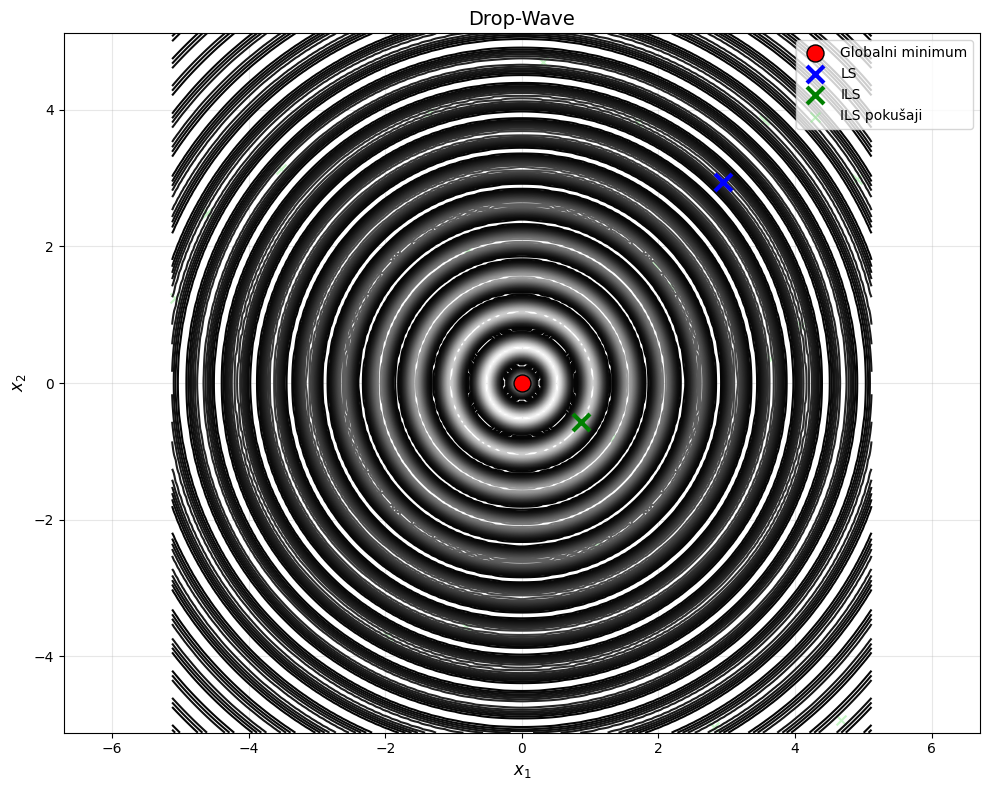


FUNKCIJA: Holder Table
LS:  x = [4.9  6.55], f(x) = -4.711697
ILS: x = [ 8.06786047 -9.6773573 ], f(x) = -19.205190
Globalni minimum: x = [8.05502, 9.66459], f(x) = -19.208503
Broj globalnih minimuma: 4
ILS broj pokušaja: 21


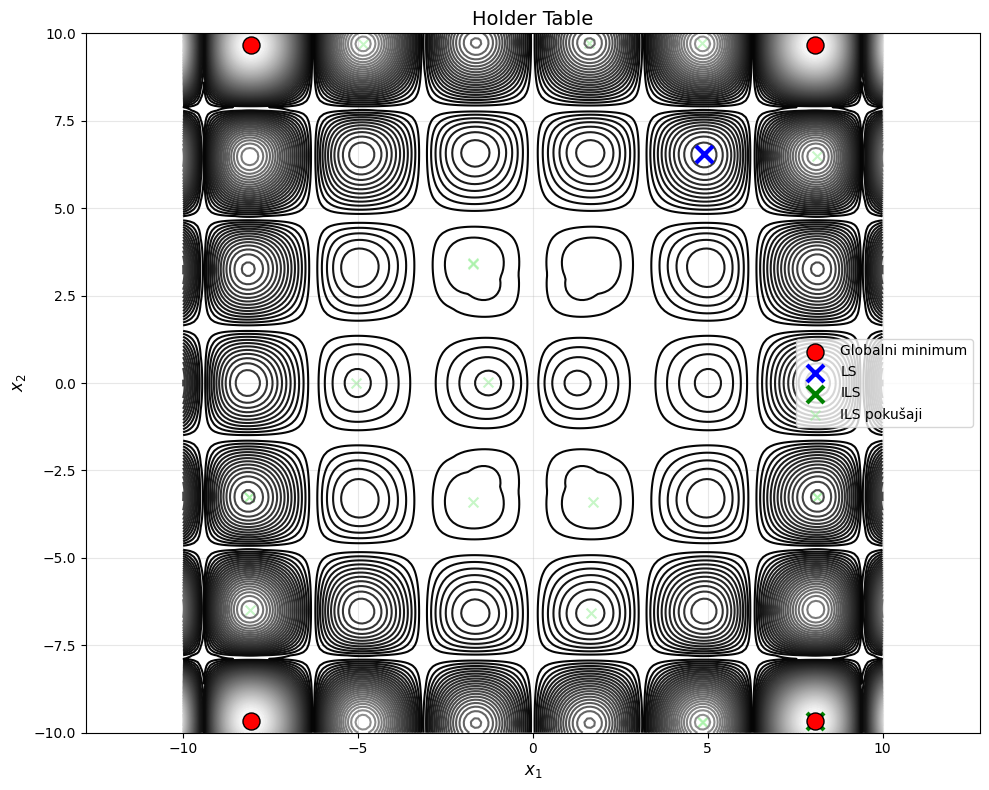

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ===== TESTNE FUNKCIJE =====

def paraboloid(x1, x2):
    return x1**2 + x2**2

def rastrigin(x1, x2):
    A = 10
    return A*2 + (x1**2 - A*np.cos(2*np.pi*x1)) + (x2**2 - A*np.cos(2*np.pi*x2))

def drop_wave(x1, x2):
    num = 1 + np.cos(12*np.sqrt(x1**2 + x2**2))
    den = 0.5*(x1**2 + x2**2) + 2
    return -num/den

def holder_table(x1, x2):
    return -np.abs(np.sin(x1)*np.cos(x2)*np.exp(np.abs(1 - np.sqrt(x1**2 + x2**2)/np.pi)))


# ===== FUNKCIJA ZA CRTANJE =====

def plot_rezultati(f, opseg, naziv, globalni_min, x_ls, x_ils, Omega_mem):
    """
    Crta contour plot sa rezultatima.
    globalni_min može biti lista jedne ili više tačaka.
    """
    x1 = np.linspace(opseg[0][0], opseg[0][1], 200)
    x2 = np.linspace(opseg[1][0], opseg[1][1], 200)
    X1, X2 = np.meshgrid(x1, x2)
    Y = f(X1, X2)

    plt.figure(figsize=(10, 8))

    # Contour plot
    plt.contour(X1, X2, Y, 50, cmap='binary')

    # Globalni minimum(i) - crveni kružići
    for gm in globalni_min:
        plt.scatter(gm[0], gm[1], color='red', marker='o',
                    s=150, label='Globalni minimum' if gm == globalni_min[0] else '',
                    zorder=5, edgecolors='black')

    # LS rezultat - plavi križić
    plt.scatter(x_ls[0], x_ls[1], color='blue', marker='x',
                s=150, label='LS', linewidths=3, zorder=4)

    # ILS rezultat - zeleni križić
    plt.scatter(x_ils[0], x_ils[1], color='green', marker='x',
                s=150, label='ILS', linewidths=3, zorder=4)

    # Svi pronađeni lokalni minimumi (ILS memorija)
    if Omega_mem:
        mem_x = [m[0][0] for m in Omega_mem]
        mem_y = [m[0][1] for m in Omega_mem]
        plt.scatter(mem_x, mem_y, color='lightgreen', marker='x',
                    s=50, alpha=0.5, label='ILS pokušaji')

    plt.xlabel('$x_1$', fontsize=12)
    plt.ylabel('$x_2$', fontsize=12)
    plt.title(naziv, fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


# ===== TESTIRANJE =====

# Postavke
delta_x = 0.05
N = 1000
eps = 0.0001
M = 20

# Lista funkcija za testiranje
testovi = [
    {
        'f': paraboloid,
        'opseg': [[-5, 5], [-5, 5]],
        'x0': [4, 4],
        'globalni_min': [[0, 0]],  # Lista listi!
        'naziv': 'Paraboloid: $f(x_1,x_2) = x_1^2 + x_2^2$'
    },
    {
        'f': rastrigin,
        'opseg': [[-5.12, 5.12], [-5.12, 5.12]],
        'x0': [4, 4],
        'globalni_min': [[0, 0]],
        'naziv': 'Rastrigin'
    },
    {
        'f': drop_wave,
        'opseg': [[-5.12, 5.12], [-5.12, 5.12]],
        'x0': [3, 3],
        'globalni_min': [[0, 0]],
        'naziv': 'Drop-Wave'
    },
    {
        'f': holder_table,
        'opseg': [[-10, 10], [-10, 10]],
        'x0': [5, 5],
        'globalni_min': [
            [8.05502, 9.66459],
            [8.05502, -9.66459],
            [-8.05502, 9.66459],
            [-8.05502, -9.66459]
        ],  # SVA 4 globalna minimuma!
        'naziv': 'Holder Table'
    }
]

# Pokreni testove
for test in testovi:
    print(f"\n{'='*50}")
    print(f"FUNKCIJA: {test['naziv']}")
    print(f"{'='*50}")

    # LS
    x_ls, v_ls = LS(test['f'], test['opseg'], test['x0'], delta_x, N, eps)
    print(f"LS:  x = {x_ls}, f(x) = {v_ls:.6f}")

    # ILS
    x_ils, v_ils, Omega_mem = ILS(test['f'], test['opseg'], test['x0'],
                                    delta_x, N, eps, M)
    print(f"ILS: x = {x_ils}, f(x) = {v_ils:.6f}")

    # Globalni minimum
    v_global = test['f'](*test['globalni_min'][0])  # Uzmi prvi
    print(f"Globalni minimum: x = {test['globalni_min'][0]}, f(x) = {v_global:.6f}")
    print(f"Broj globalnih minimuma: {len(test['globalni_min'])}")
    print(f"ILS broj pokušaja: {len(Omega_mem)}")

    # Crtaj
    plot_rezultati(test['f'], test['opseg'], test['naziv'],
                   test['globalni_min'], x_ls, x_ils, Omega_mem)